In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

plt.style.use('seaborn-v0_8-darkgrid')
#print("All libraries imported successfully!")

In [46]:
#Pulling my first stock data
#.NS is the national stock exchange(India)
tickrs = ["RELIANCE.NS", "TCS.NS", "INFY.NS"]
data = yf.download(tickrs, start = "2023-01-01", end = "2025-01-01")
data.shape
print("\nFirst 5 rows")
data.head()

[*********************100%***********************]  3 of 3 completed


First 5 rows


Price             Close                                   High               \
Ticker          INFY.NS  RELIANCE.NS       TCS.NS      INFY.NS  RELIANCE.NS   
Date                                                                          
2023-01-02  1397.702148  1175.889648  2932.793945  1399.994967  1177.304802   
2023-01-03  1396.372314  1167.284668  2977.665527  1405.635278  1174.565828   
2023-01-04  1370.922119  1149.709595  2980.632812  1394.950813  1169.110728   
2023-01-05  1352.946289  1147.655273  2977.440430  1381.102167  1157.858026   
2023-01-06  1328.459106  1158.086304  2887.922119  1352.762984  1163.130627   

Price                            Low                                   Open  \
Ticker           TCS.NS      INFY.NS  RELIANCE.NS       TCS.NS      INFY.NS   
Date                                                                          
2023-01-02  2937.649920  1379.405502  1163.244669  2909.189155  1388.530874   
2023-01-03  2985.443779  1389.539648  1163.062148  2918.271338  1393.896003   
2023-01-04  2992.053210  1367.528680  1147.632506  2955.049761  1394.950813   
2023-01-05  3001.000211  1347.489426  1143.067494  2951.227744  1381.102167   
2023-01-06  2968.852818  1326.624852  1149.595501  2877.535969  1348.177347   

Price                                  Volume                       
Ticker      RELIANCE.NS       TCS.NS  INFY.NS RELIANCE.NS   TCS.NS  
Date                                                                
2023-01-02  1164.066352  2932.389336  3801140     5316175   709547  
2023-01-03  1170.936659  2924.296136  4551130     7658932  1245178  
2023-01-04  1167.261851  2973.483977  7059590     9264891  1231668  
2023-01-05  1151.969199  2994.615590  9868404    13637099  1826057  
2023-01-06  1153.407240  2967.458968  6443714     6349597  2488376

In [ ]:
#Cell 3- Understand the Data Structure
#check all column names
data.columns
#check the data types
data.dtypes
#check for missing values
print("\nMissingValues")
print(data.isnull().sum())

**Stop here and understand OHLCV:**

#What is OHLCV
- O = Open: Price at market open
- H = High: Highest price during the day
- L = Low: Lowest price during the day
- C = Close: Price at market close
- V = Volume: Number of shares traded that day
Close price is what we use the most in finance.

In [ ]:
close = data['Close']
close.head(10)

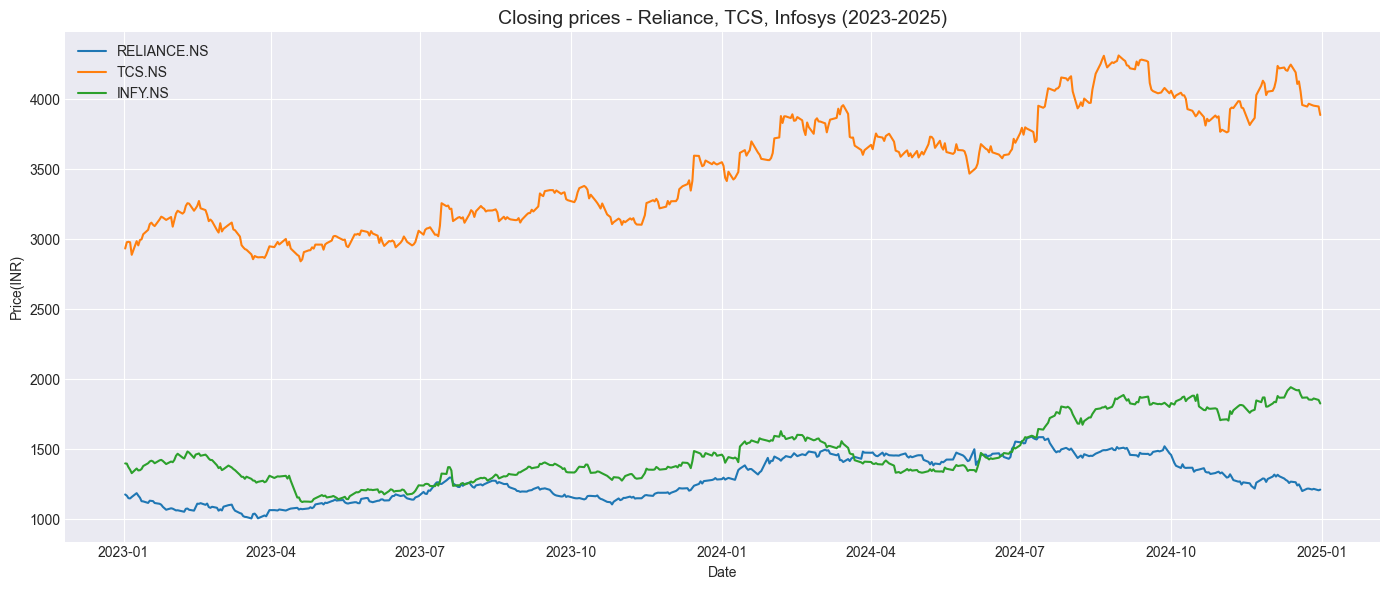

In [39]:
plt.figure(figsize=(14,6))
for tickr in tickrs:
    plt.plot(close[tickr], label = tickr)

plt.title("Closing prices - Reliance, TCS, Infosys (2023-2025)", fontsize =14)
plt.xlabel("Date")
plt.ylabel("Price(INR)")
plt.legend()
plt.tight_layout()
plt.savefig("closing_prices.png")
plt.show()

In [ ]:
#Calculating simple daily returns
#simple return is (today's price - yesterday's price)/yesterday's price

simple_returns = close.pct_change()
simple_returns = simple_returns.dropna()
print(simple_returns.head())
print(simple_returns.mean())

In [ ]:
#log return = ln(Today's price/ yesterday's price)
log_returns = np.log(close/close.shift(1))
#dropping the first columns
log_returns = log_returns.dropna()

log_returns.head()

**Simple Returns vs Log Returns**

Simple return tells you the percentage(%) change day to day.

Log return is used in finance because: 
1. They are additive over time; you can just add them up. For eg., ln(tp/yp) = ln(tp) - ln(yp)
2. They handle compounding naturally
3. They are more normally distributed - important for ML models

Rule of Thumb: For small returns they are almost identical.
For research and ML they use log returns.

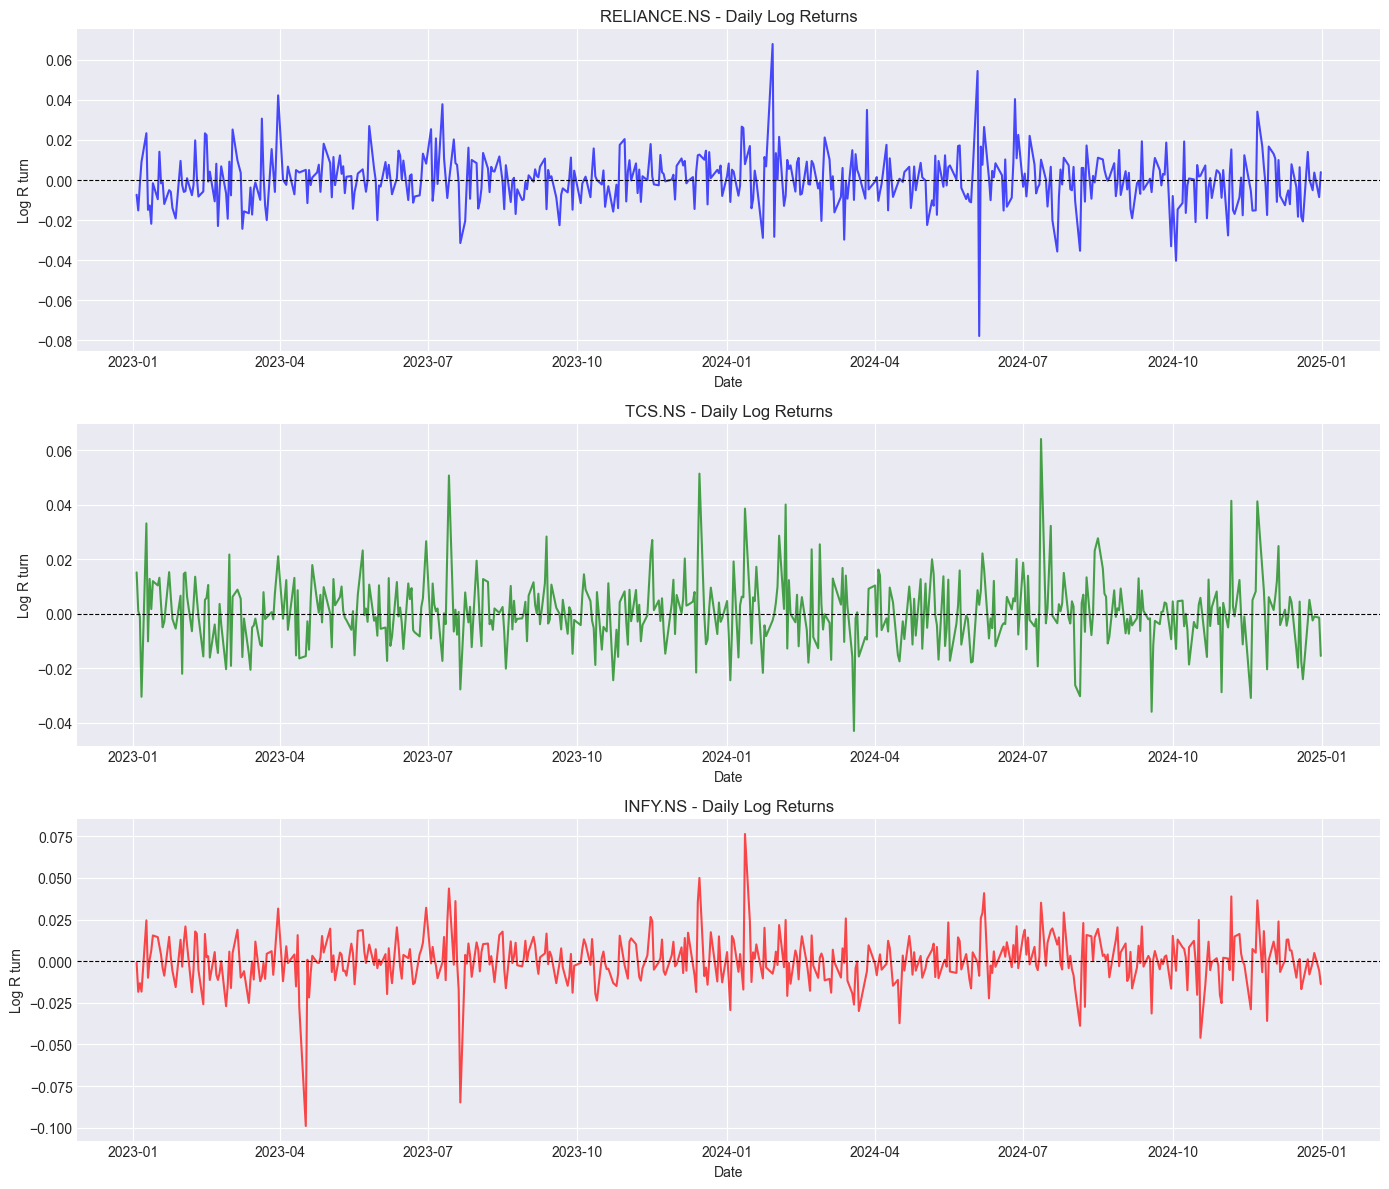

In [38]:
#Plot for log returns
fig, axes = plt.subplots(3, 1, figsize=(14,12))

for i,tickr in enumerate(tickrs):
    axes[i].plot(log_returns[tickr], alpha=0.7, color = ["blue", "green", "red"][i])
    axes[i].set_title(f"{tickr} - Daily Log Returns")
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Log R turn")
    axes[i].axhline(y=0, color="black", linestyle = "--", linewidth=0.8)

plt.tight_layout()
plt.savefig("log_returns.png")
plt.show()

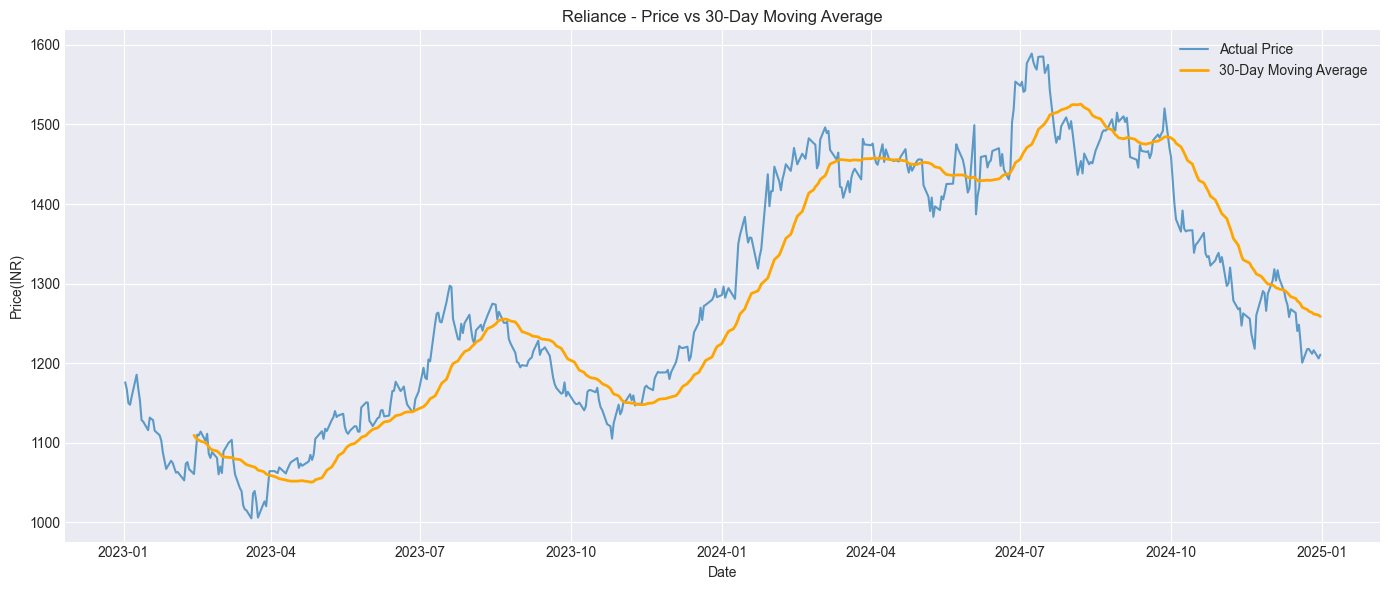

In [37]:
#30-day rolling mean of closing prices

rolling_30 = close.rolling(window = 30).mean()
#plot actual price vs rolling average for reliance
plt.figure(figsize = (14,6))
plt.plot(close["RELIANCE.NS"], label="Actual Price", alpha=0.7)
plt.plot(rolling_30["RELIANCE.NS"], label = "30-Day Moving Average", linewidth = 2, color = "orange")
plt.title("Reliance - Price vs 30-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price(INR)")
plt.legend()
plt.tight_layout()
plt.savefig("moving_average.png")
plt.show()

In [45]:
print("="*50)
print("Return Statistics")
print("="*50)

for tickr in tickrs:
    print("{}: ".format(tickr))
    print("  Mean Daily Return: {:.4f}".format(log_returns[tickr].mean()))
    print("  Volatality (Std Dev): {:.4f}".format(log_returns[tickr].std()))
    print("  Best Day: {:.4f}".format(log_returns[tickr].max()))
    print("  Worst Day: {:.4f}".format(log_returns[tickr].min()))
    print()
    

Return Statistics
RELIANCE.NS: 
  Mean Daily Return: 0.0001
  Volatality (Std Dev): 0.0128
  Best Day: 0.0678
  Worst Day: -0.0778

TCS.NS: 
  Mean Daily Return: 0.0006
  Volatality (Std Dev): 0.0124
  Best Day: 0.0642
  Worst Day: -0.0431

INFY.NS: 
  Mean Daily Return: 0.0005
  Volatality (Std Dev): 0.0146
  Best Day: 0.0763
  Worst Day: -0.0990



Volatility is a really important concept in finance. Volatility is the standard deviation of returns.

Higher Volatility = riskier stock